In [2]:
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Extract Rain Data 
precip = "rain.nc"
ds_precip = xr.open_dataset(precip)
print(ds_precip)

<xarray.Dataset> Size: 166kB
Dimensions:                        (lat: 195, lon: 202, latv: 2, lonv: 2)
Coordinates:
  * lat                            (lat) float64 2kB 20.85 20.95 ... 40.15 40.25
  * lon                            (lon) float32 808B 19.35 19.45 ... 39.45
Dimensions without coordinates: latv, lonv
Data variables:
    GPM_3IMERGDE_07_precipitation  (lat, lon) float32 158kB ...
    lat_bnds                       (lat, latv) float64 3kB ...
    lon_bnds                       (lon, lonv) float64 3kB ...
Attributes:
    Conventions:         CF-1.4
    NCO:                 netCDF Operators version 5.0.6 (Homepage = http://nc...
    start_time:          2015-01-01T00:00:00Z
    end_time:            2024-08-31T23:59:59Z
    history:             Tue Sep 30 13:13:06 2025: ncks -O -x -v time_bnds ti...
    userstartdate:       2015-01-01T00:00:00Z
    userenddate:         2024-08-31T23:59:59Z
    title:               Time Averaged Map of Daily mean precipitation rate (...
    plo

In [4]:
# Extract Wind Data
wind   = "wind.nc"
ds_wind   = xr.open_dataset(wind)
print(ds_wind)

<xarray.Dataset> Size: 7kB
Dimensions:                 (lat: 39, lon: 33, latv: 2, lonv: 2)
Coordinates:
  * lat                     (lat) float64 312B 21.0 21.5 22.0 ... 39.0 39.5 40.0
  * lon                     (lon) float64 264B 19.38 20.0 20.62 ... 38.75 39.38
Dimensions without coordinates: latv, lonv
Data variables:
    M2TMNXFLX_5_12_4_SPEED  (lat, lon) float32 5kB ...
    lat_bnds                (lat, latv) float64 624B ...
    lon_bnds                (lon, lonv) float64 528B ...
Attributes:
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    nco_openmp_thread_number:  1
    Conventions:               CF-1.4
    start_time:                2015-01-01T00:00:00Z
    end_time:                  2024-08-31T23:59:59Z
    history:                   Tue Sep 30 13:40:15 2025: ncks -O -x -v time_b...
    userstartdate:             2015-01-01T00:00:00Z
    userenddate:               2024-08-31T23:59:59Z
    title:                     Time Averaged Map of S

In [6]:
# Extract Temp Data
temp = "Temp.nc"
ds_temp   = xr.open_dataset(temp)
print(ds_temp)


<xarray.Dataset> Size: 7kB
Dimensions:               (lat: 39, lon: 33, latv: 2, lonv: 2)
Coordinates:
  * lat                   (lat) float64 312B 21.0 21.5 22.0 ... 39.0 39.5 40.0
  * lon                   (lon) float64 264B 19.38 20.0 20.62 ... 38.75 39.38
Dimensions without coordinates: latv, lonv
Data variables:
    M2TMNXSLV_5_12_4_T2M  (lat, lon) float32 5kB ...
    lat_bnds              (lat, latv) float64 624B ...
    lon_bnds              (lon, lonv) float64 528B ...
Attributes:
    nco_openmp_thread_number:  1
    Conventions:               CF-1.4
    start_time:                2015-01-01T00:00:00Z
    end_time:                  2024-08-31T23:59:59Z
    NCO:                       netCDF Operators version 5.0.6 (Homepage = htt...
    history:                   Tue Sep 30 13:56:37 2025: ncks -O -x -v time_b...
    userstartdate:             2015-01-01T00:00:00Z
    userenddate:               2024-08-31T23:59:59Z
    title:                     Time Averaged Map of 2-meter air t

In [8]:
# ----------- Loading Data ----------- 
precip_file = "rain.nc"     
wind_file   = "wind.nc"
temp_file   = "temp.nc"

ds_precip = xr.open_dataset(precip_file)
ds_wind   = xr.open_dataset(wind_file)
ds_temp   = xr.open_dataset(temp_file)

ds_precip, ds_wind, ds_temp  

(<xarray.Dataset> Size: 166kB
 Dimensions:                        (lat: 195, lon: 202, latv: 2, lonv: 2)
 Coordinates:
   * lat                            (lat) float64 2kB 20.85 20.95 ... 40.15 40.25
   * lon                            (lon) float32 808B 19.35 19.45 ... 39.45
 Dimensions without coordinates: latv, lonv
 Data variables:
     GPM_3IMERGDE_07_precipitation  (lat, lon) float32 158kB ...
     lat_bnds                       (lat, latv) float64 3kB ...
     lon_bnds                       (lon, lonv) float64 3kB ...
 Attributes:
     Conventions:         CF-1.4
     NCO:                 netCDF Operators version 5.0.6 (Homepage = http://nc...
     start_time:          2015-01-01T00:00:00Z
     end_time:            2024-08-31T23:59:59Z
     history:             Tue Sep 30 13:13:06 2025: ncks -O -x -v time_bnds ti...
     userstartdate:       2015-01-01T00:00:00Z
     userenddate:         2024-08-31T23:59:59Z
     title:               Time Averaged Map of Daily mean precipitatio

In [25]:
# ----------- Regrid -----------
precip_interp = ds_precip["GPM_3IMERGDE_07_precipitation"].interp(lat=temp.lat, lon=temp.lon)

In [26]:
# ----------- Variables Extraction ----------- 
precip_interp = ds_precip["GPM_3IMERGDE_07_precipitation"].interp(
    lat=ds_temp.lat, lon=ds_temp.lon
)
wind   = ds_wind["M2TMNXFLX_5_12_4_SPEED"]
temp   = ds_temp["M2TMNXSLV_5_12_4_T2M"]


In [27]:
# ----------- Convert to DataFrame ----------- 
df_precip = precip_interp.to_dataframe().reset_index()
df_wind   = wind.to_dataframe().reset_index()
df_temp   = temp.to_dataframe().reset_index()

print(df_precip.head())
print(df_wind.head())
print(df_temp.head())


    lat     lon  GPM_3IMERGDE_07_precipitation
0  21.0  19.375                       0.050856
1  21.0  20.000                       0.032792
2  21.0  20.625                       0.039034
3  21.0  21.250                       0.038189
4  21.0  21.875                       0.043102
    lat     lon  M2TMNXFLX_5_12_4_SPEED
0  21.0  19.375                5.951021
1  21.0  20.000                6.152714
2  21.0  20.625                6.473846
3  21.0  21.250                6.621065
4  21.0  21.875                6.774587
    lat     lon  M2TMNXSLV_5_12_4_T2M
0  21.0  19.375            296.466187
1  21.0  20.000            296.211090
2  21.0  20.625            296.549286
3  21.0  21.250            296.916962
4  21.0  21.875            297.006226


In [28]:
# ----------- Merge Data ----------- 
df = df_precip.merge(df_wind, on=["lat","lon"], how="inner")
df = df.merge(df_temp, on=["lat","lon"], how="inner")


In [29]:
# ----------- Rename Columns ----------- 
df = df.rename(columns={
    "GPM_3IMERGDE_07_precipitation": "precipitation_mm_day",
    "M2TMNXFLX_5_12_4_SPEED": "wind_speed_ms",
    "M2TMNXSLV_5_12_4_T2M": "temperature_K"
})

# Convert Kelvin to Celsius
df["temperature_C"] = df["temperature_K"] - 273.15

df.head()


,lat,lon,precipitation_mm_day,wind_speed_ms,temperature_K,temperature_C
0,21.0,19.375,0.050856,5.951021,296.466187,23.316193
1,21.0,20.000,0.032792,6.152714,296.211090,23.061096
2,21.0,20.625,0.039034,6.473846,296.549286,23.399292
3,21.0,21.250,0.038189,6.621065,296.916962,23.766968
4,21.0,21.875,0.043102,6.774587,297.006226,23.856232


In [30]:
# ----------- Save to CSV ----------- 
df.to_csv("Final_Climate_Dataset.csv", index=False)
print("✅Final_Climate_Dataset.csv")


✅Final_Climate_Dataset.csv


In [31]:
print(df.shape)      # عدد الصفوف والأعمدة
print(df.head())     # أول 5 صفوف
print(df.describe()) # إحصائيات عامة
print(df.isna().sum())  # عدد القيم NaN في كل عمود


(1287, 6)
    lat     lon  precipitation_mm_day  wind_speed_ms  temperature_K  \
0  21.0  19.375              0.050856       5.951021     296.466187   
1  21.0  20.000              0.032792       6.152714     296.211090   
2  21.0  20.625              0.039034       6.473846     296.549286   
3  21.0  21.250              0.038189       6.621065     296.916962   
4  21.0  21.875              0.043102       6.774587     297.006226   

   temperature_C  
0      23.316193  
1      23.061096  
2      23.399292  
3      23.766968  
4      23.856232  
               lat          lon  precipitation_mm_day  wind_speed_ms  \
count  1287.000000  1287.000000           1287.000000    1287.000000   
mean     30.500000    29.375000              0.672372       5.991769   
std       5.629502     5.953504              0.764595       0.726592   
min      21.000000    19.375000              0.003474       3.399403   
25%      25.500000    24.375000              0.045746       5.589379   
50%      30.50000

In [32]:
print("Precip lat:", precip_interp.lat.values[:5])
print("Wind   lat:", wind.lat.values[:5])
print("Temp   lat:", temp.lat.values[:5])

print("Precip lon:", precip_interp.lon.values[:5])
print("Wind   lon:", wind.lon.values[:5])
print("Temp   lon:", temp.lon.values[:5])


Precip lat: [21.  21.5 22.  22.5 23. ]
Wind   lat: [21.  21.5 22.  22.5 23. ]
Temp   lat: [21.  21.5 22.  22.5 23. ]
Precip lon: [19.375 20.    20.625 21.25  21.875]
Wind   lon: [19.375 20.    20.625 21.25  21.875]
Temp   lon: [19.375 20.    20.625 21.25  21.875]


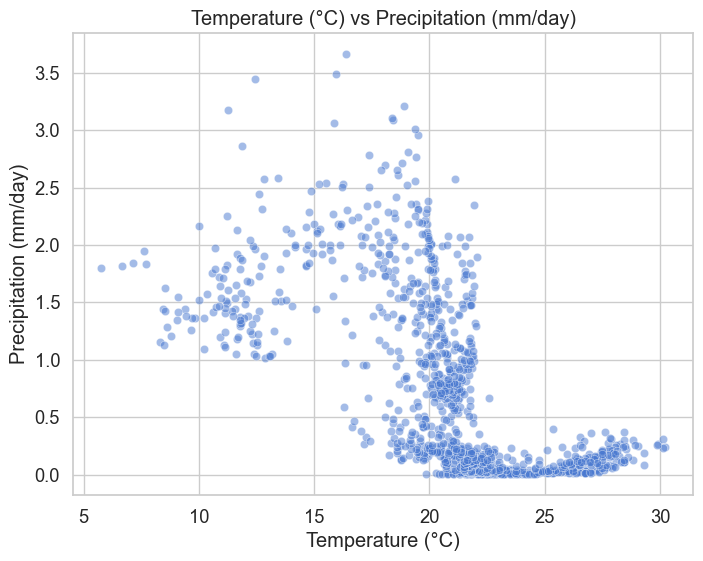

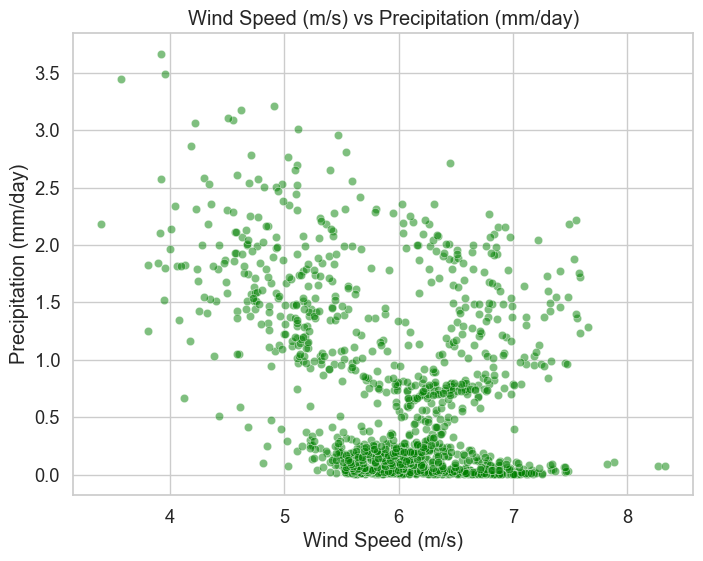

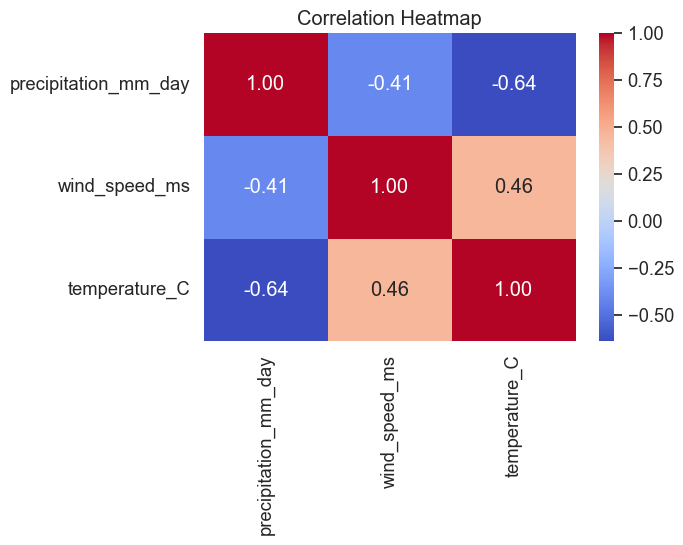

In [ ]:


sns.set(style="whitegrid", palette="muted", font_scale=1.2)

# ----------- Scatter Plot (Temperature vs Precipitation) ----------- 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="temperature_C", y="precipitation_mm_day", alpha=0.5)
plt.title("Temperature (°C) vs Precipitation (mm/day)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm/day)")
plt.show()

# ----------- Scatter Plot (Wind vs Precipitation) ----------- 
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="wind_speed_ms", y="precipitation_mm_day", alpha=0.5, color="green")
plt.title("Wind Speed (m/s) vs Precipitation (mm/day)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (mm/day)")
plt.show()

# ----------- Heatmap (Correlation) ----------- 
plt.figure(figsize=(6,4))
sns.heatmap(df[["precipitation_mm_day","wind_speed_ms","temperature_C"]].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


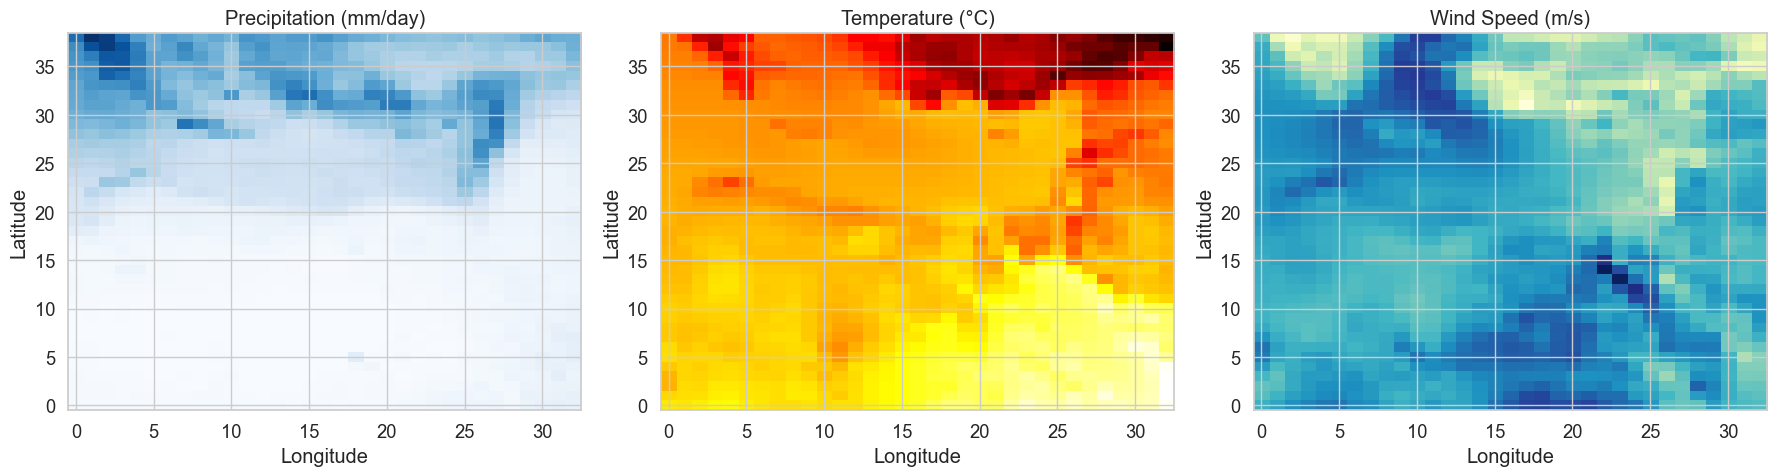

In [34]:


# ----------- Visualization -----------

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Rainfall
df_pivot = df.pivot(index="lat", columns="lon", values="precipitation_mm_day")
axes[0].imshow(df_pivot, origin="lower", cmap="Blues", aspect="auto")
axes[0].set_title("Precipitation (mm/day)")
axes[0].set_xlabel("Longitude")
axes[0].set_ylabel("Latitude")

# Temperature
df_pivot = df.pivot(index="lat", columns="lon", values="temperature_C")
axes[1].imshow(df_pivot, origin="lower", cmap="hot", aspect="auto")
axes[1].set_title("Temperature (°C)")
axes[1].set_xlabel("Longitude")
axes[1].set_ylabel("Latitude")

# Wind
df_pivot = df.pivot(index="lat", columns="lon", values="wind_speed_ms")
axes[2].imshow(df_pivot, origin="lower", cmap="YlGnBu", aspect="auto")
axes[2].set_title("Wind Speed (m/s)")
axes[2].set_xlabel("Longitude")
axes[2].set_ylabel("Latitude")

plt.tight_layout()
plt.show()


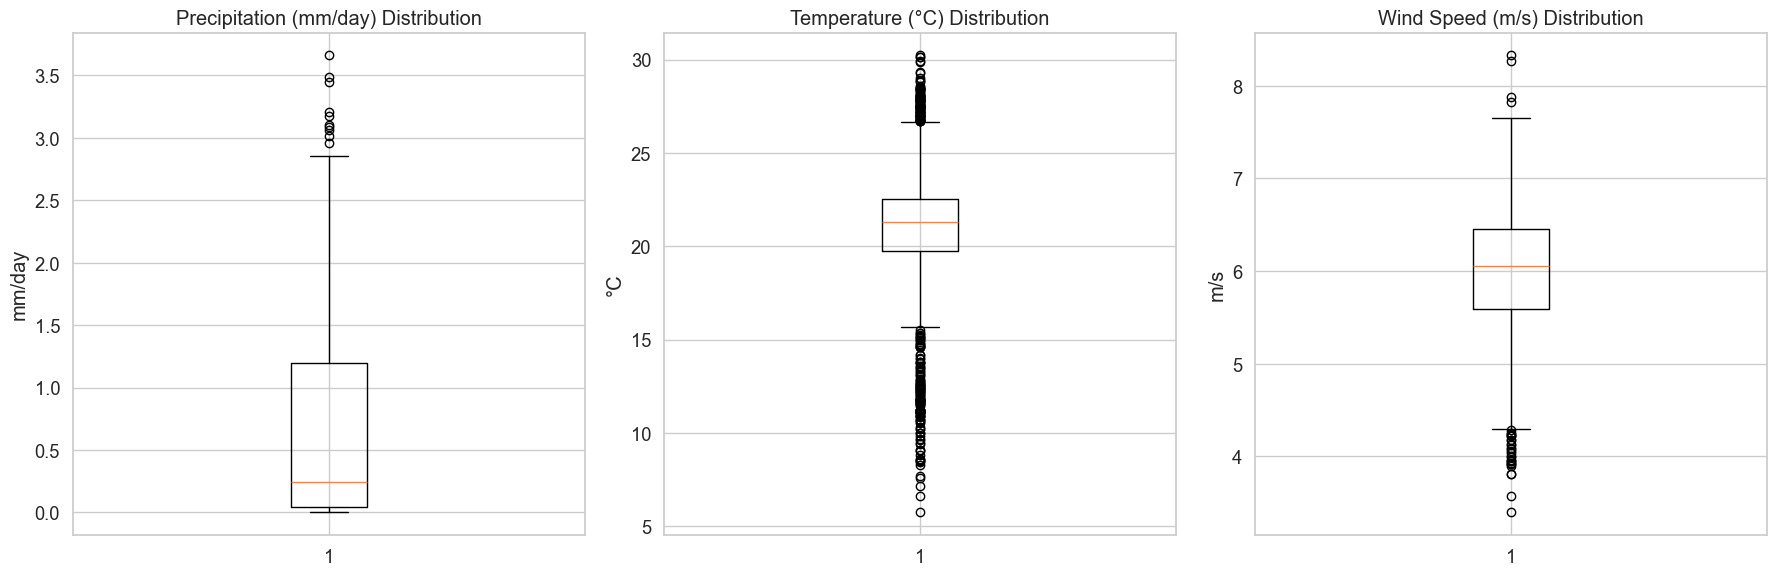

In [35]:
# ----------- Boxplots -----------
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Precipitation
axes[0].boxplot(df["precipitation_mm_day"].dropna())
axes[0].set_title("Precipitation (mm/day) Distribution")
axes[0].set_ylabel("mm/day")

# Temperature
axes[1].boxplot(df["temperature_C"].dropna())
axes[1].set_title("Temperature (°C) Distribution")
axes[1].set_ylabel("°C")

# Wind Speed
axes[2].boxplot(df["wind_speed_ms"].dropna())
axes[2].set_title("Wind Speed (m/s) Distribution")
axes[2].set_ylabel("m/s")

plt.tight_layout()
plt.show()


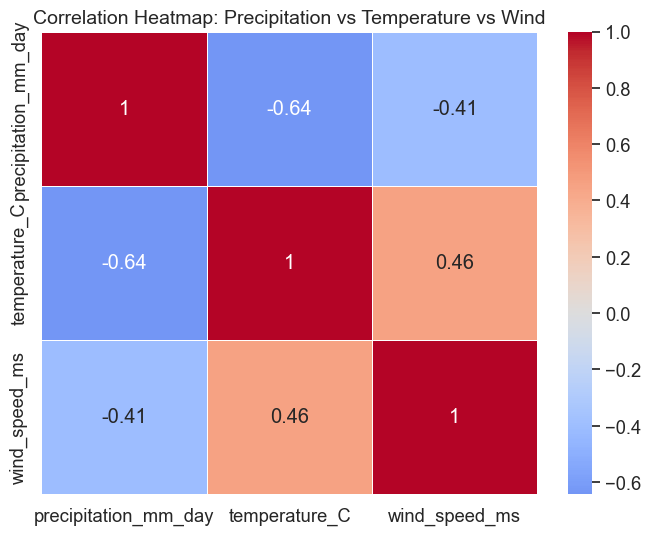

In [36]:
# ----------- Correlation Heatmap -----------
plt.figure(figsize=(8,6))
corr = df[["precipitation_mm_day", "temperature_C", "wind_speed_ms"]].corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", center=0, linewidths=0.5)

plt.title("Correlation Heatmap: Precipitation vs Temperature vs Wind", fontsize=14)
plt.show()

       precipitation_mm_day  temperature_C  wind_speed_ms
count           1287.000000    1287.000000    1287.000000
mean               0.672372      20.862513       5.991769
std                0.764595       3.995262       0.726592
min                0.003474       5.767822       3.399403
25%                0.045746      19.743546       5.589379
50%                0.241683      21.316589       6.057850
75%                1.194741      22.525528       6.458997
max                3.660793      30.221680       8.329473


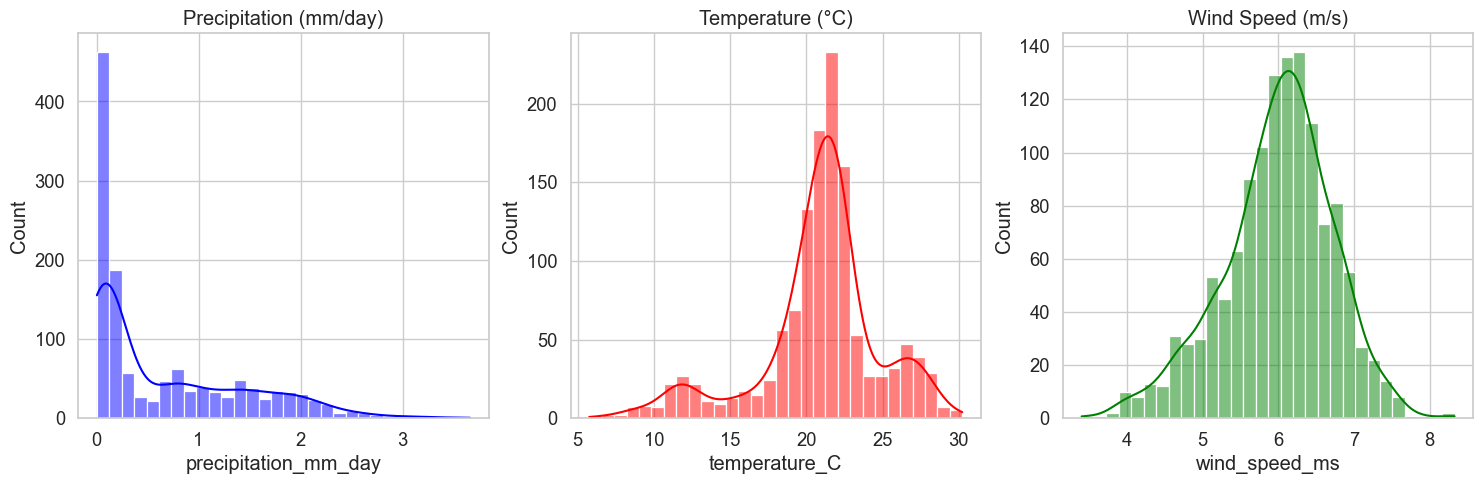

In [37]:
# ----------- Descriptive Statistics -----------
stats = df[["precipitation_mm_day", "temperature_C", "wind_speed_ms"]].describe()
print(stats)

# ----------- Histogram لكل متغير -----------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(df["precipitation_mm_day"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Precipitation (mm/day)")

sns.histplot(df["temperature_C"], bins=30, kde=True, ax=axes[1], color="red")
axes[1].set_title("Temperature (°C)")

sns.histplot(df["wind_speed_ms"], bins=30, kde=True, ax=axes[2], color="green")
axes[2].set_title("Wind Speed (m/s)")

plt.show()


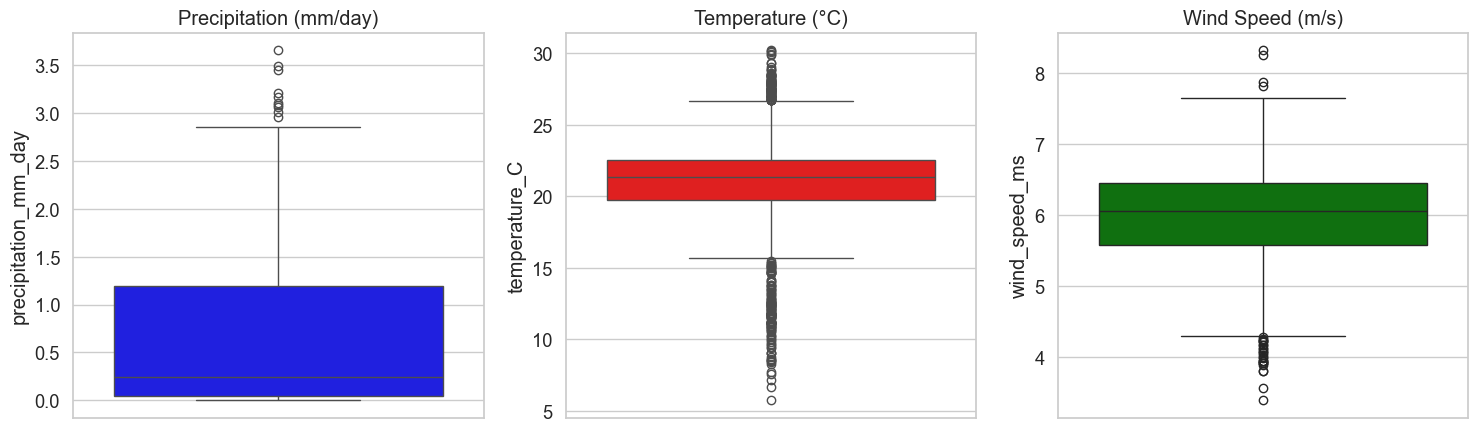

In [38]:
# ----------- Boxplots -----------
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.boxplot(y=df["precipitation_mm_day"], ax=axes[0], color="blue")
axes[0].set_title("Precipitation (mm/day)")

sns.boxplot(y=df["temperature_C"], ax=axes[1], color="red")
axes[1].set_title("Temperature (°C)")

sns.boxplot(y=df["wind_speed_ms"], ax=axes[2], color="green")
axes[2].set_title("Wind Speed (m/s)")

plt.show()


In [39]:
# ----------- Rain condition -----------
def rain_condition(x):
    if x == 0:
        return "No Rain"
    elif x <= 5:
        return "Light Rain"
    else:
        return "Heavy Rain"

# ----------- Temperature condition -----------
def temp_condition(x):
    if x < 10:
        return "Cold"
    elif x <= 25:
        return "Mild"
    else:
        return "Hot"

# ----------- Wind condition -----------
def wind_condition(x):
    if x < 3:
        return "Calm"
    elif x <= 7:
        return "Breezy"
    else:
        return "Windy"

# Apply conditions
df["Rain_Cond"] = df["precipitation_mm_day"].apply(rain_condition)
df["Temp_Cond"] = df["temperature_C"].apply(temp_condition)
df["Wind_Cond"] = df["wind_speed_ms"].apply(wind_condition)

# Combine into one Condition
df["Condition"] = df["Rain_Cond"] + " | " + df["Temp_Cond"] + " | " + df["Wind_Cond"]

# Save new dataset
df.to_csv("Final_Dataset_classified.csv", index=False)

print("✅ Final_Dataset_classified.csv")
print(df[["precipitation_mm_day","temperature_C","wind_speed_ms","Condition"]].head())


✅ Final_Dataset_classified.csv
   precipitation_mm_day  temperature_C  wind_speed_ms  \
0              0.050856      23.316193       5.951021   
1              0.032792      23.061096       6.152714   
2              0.039034      23.399292       6.473846   
3              0.038189      23.766968       6.621065   
4              0.043102      23.856232       6.774587   

                    Condition  
0  Light Rain | Mild | Breezy  
1  Light Rain | Mild | Breezy  
2  Light Rain | Mild | Breezy  
3  Light Rain | Mild | Breezy  
4  Light Rain | Mild | Breezy  


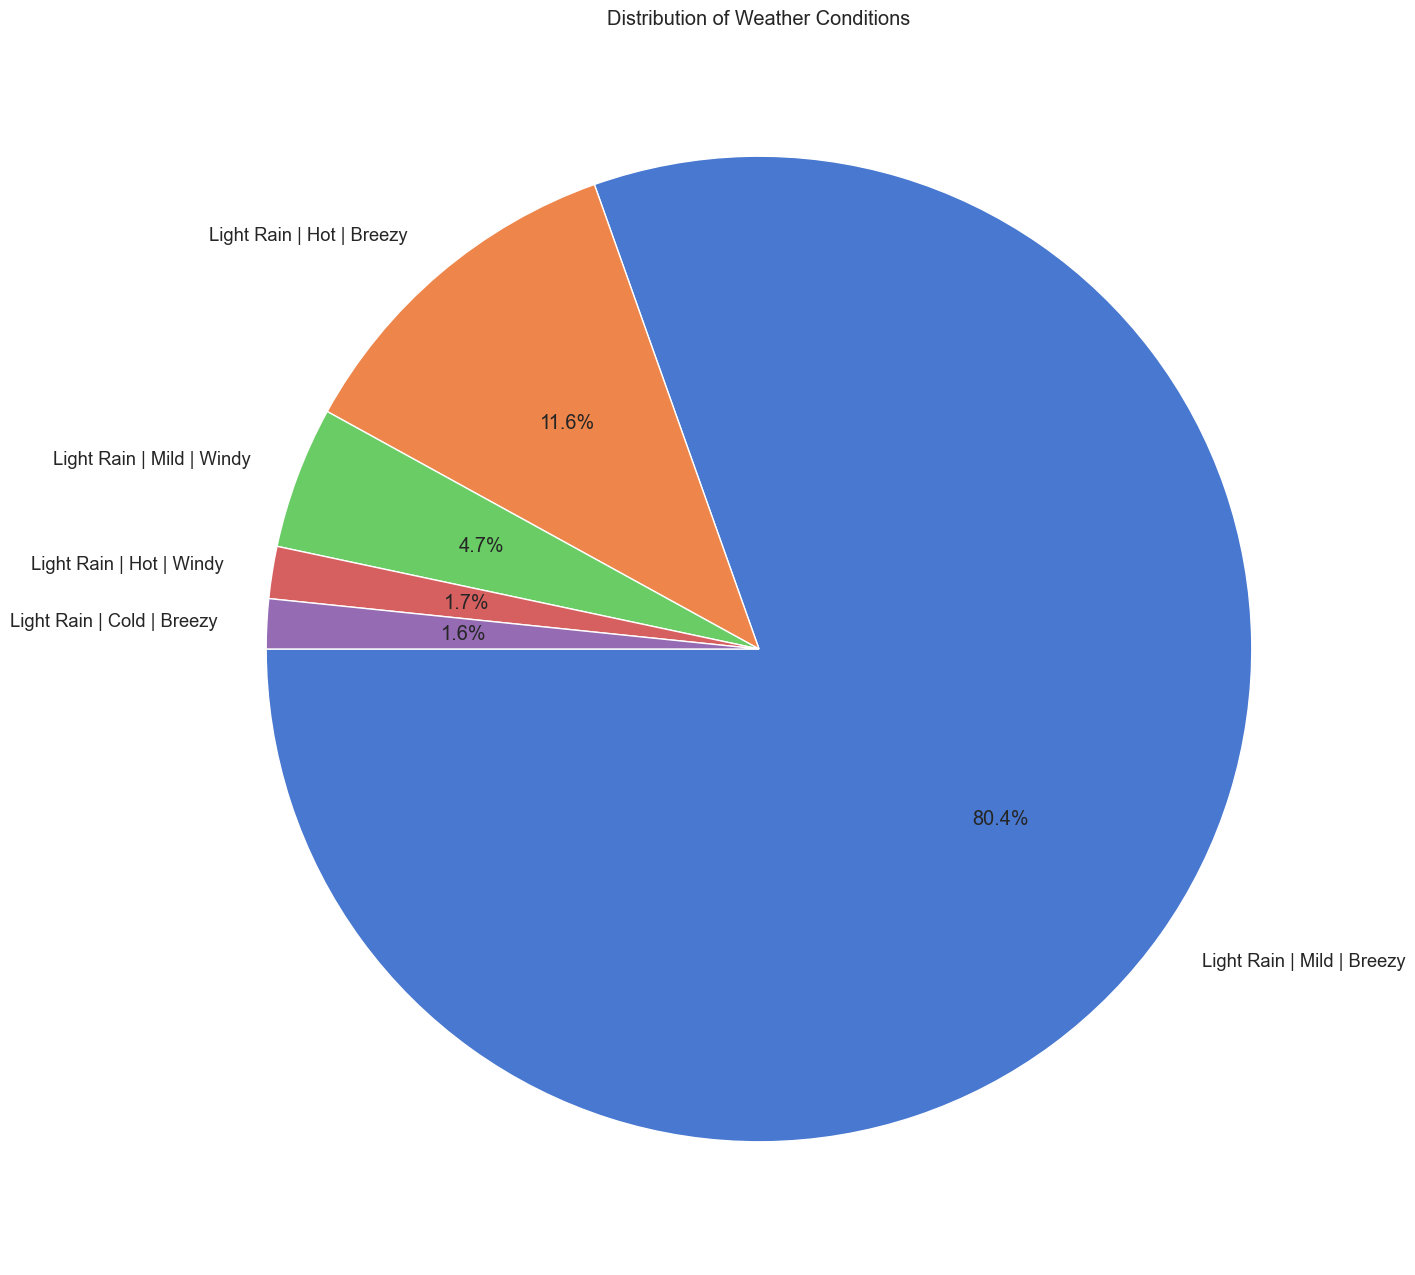

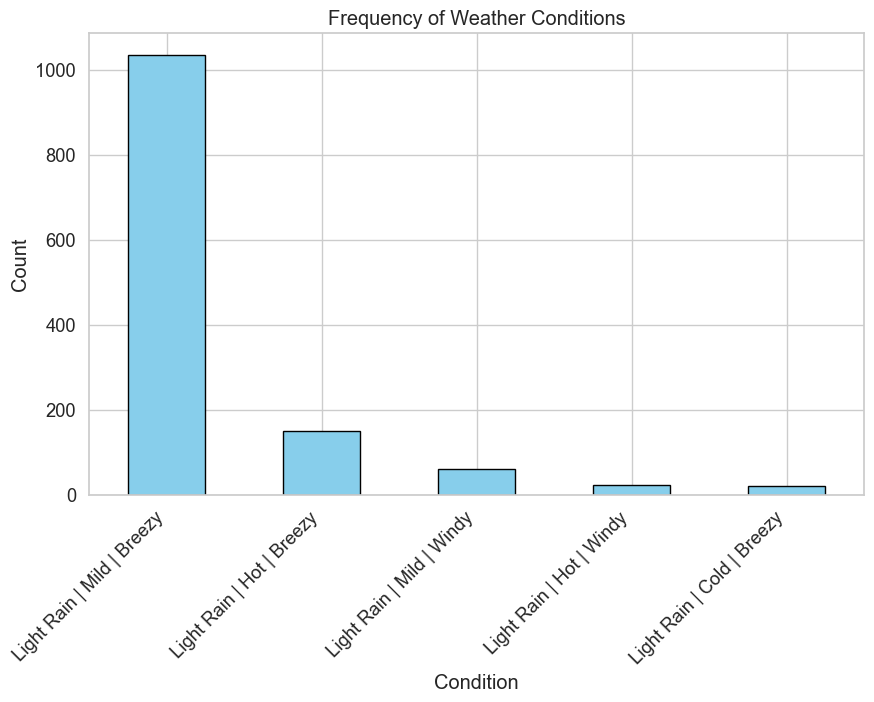

In [43]:


# ----------- Pie Chart -----------
condition_counts = df["Condition"].value_counts()

plt.figure(figsize=(16,16))
plt.pie(condition_counts, labels=condition_counts.index, autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Weather Conditions")
plt.show()

# ----------- Bar Chart -----------
plt.figure(figsize=(10,6))
condition_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Frequency of Weather Conditions")
plt.xlabel("Condition")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")
plt.show()


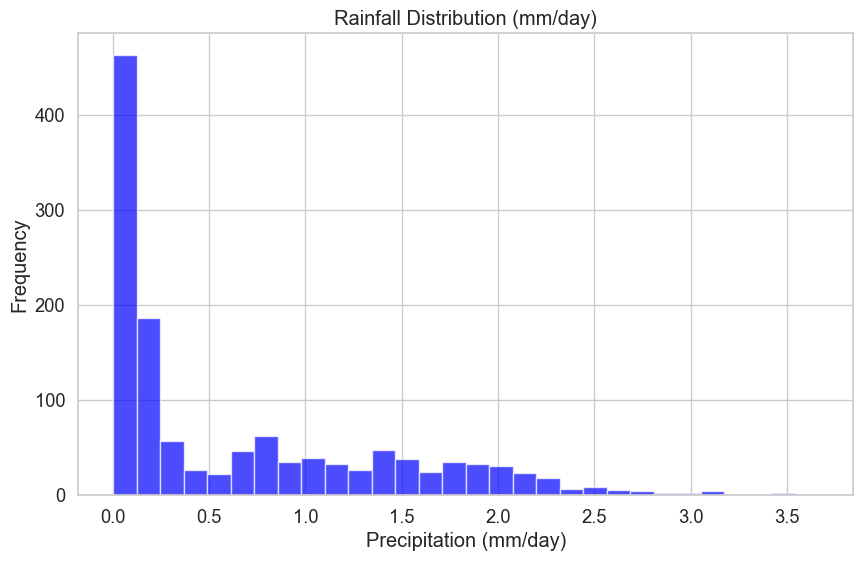

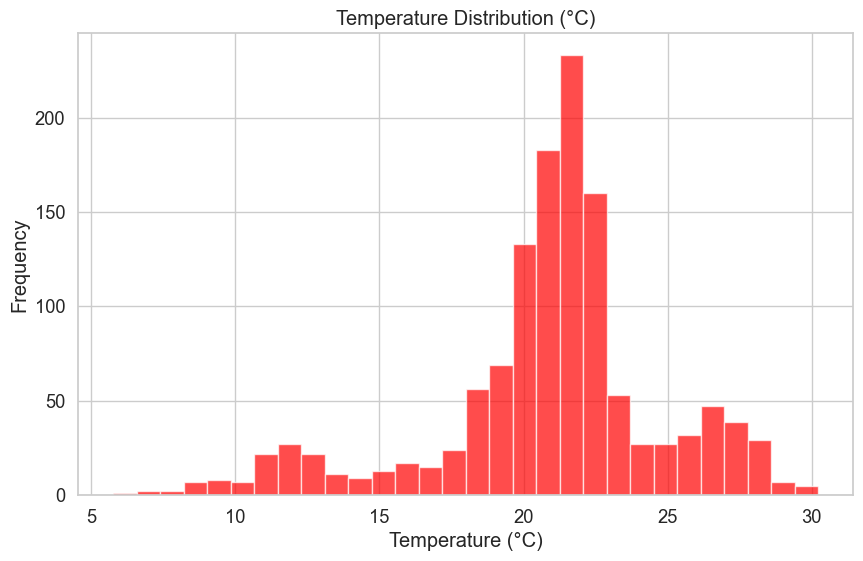

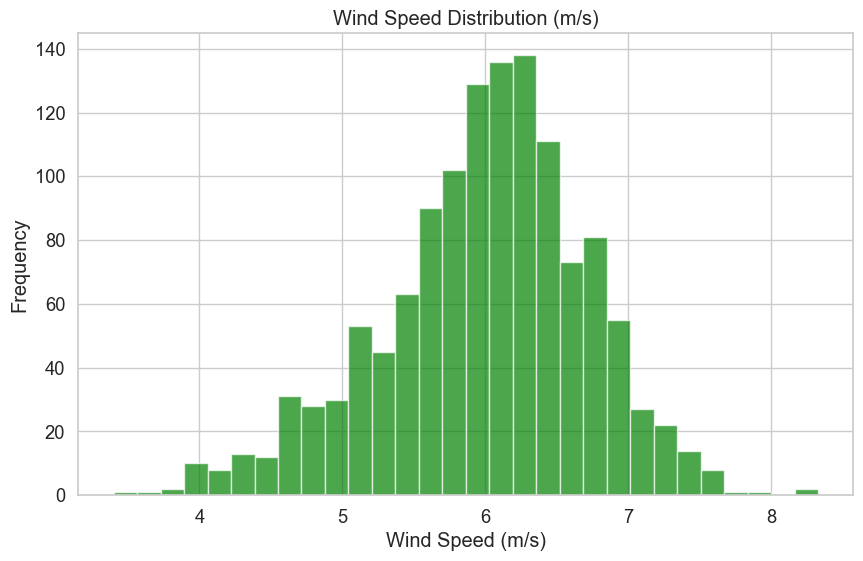

In [44]:
# ----------- Rain Distribution -----------
plt.figure(figsize=(10,6))
df["precipitation_mm_day"].hist(bins=30, color="blue", alpha=0.7)
plt.title("Rainfall Distribution (mm/day)")
plt.xlabel("Precipitation (mm/day)")
plt.ylabel("Frequency")
plt.show()

# ----------- Temperature Distribution -----------
plt.figure(figsize=(10,6))
df["temperature_C"].hist(bins=30, color="red", alpha=0.7)
plt.title("Temperature Distribution (°C)")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.show()

# ----------- Wind Speed Distribution -----------
plt.figure(figsize=(10,6))
df["wind_speed_ms"].hist(bins=30, color="green", alpha=0.7)
plt.title("Wind Speed Distribution (m/s)")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Frequency")
plt.show()


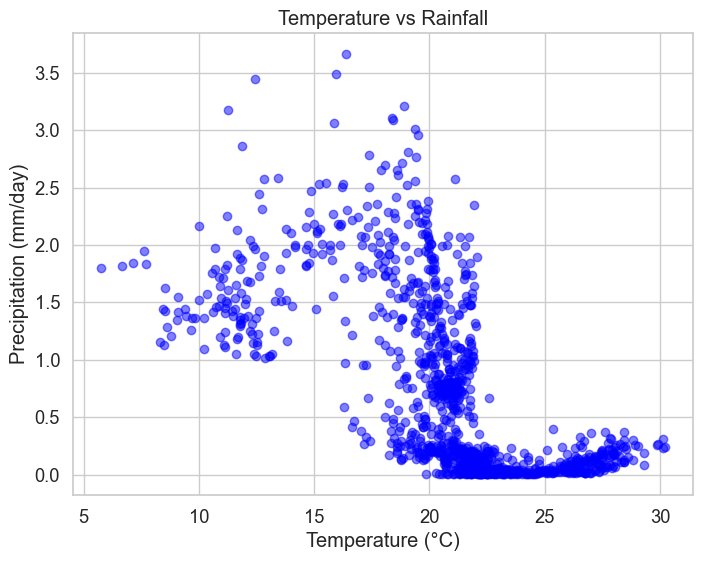

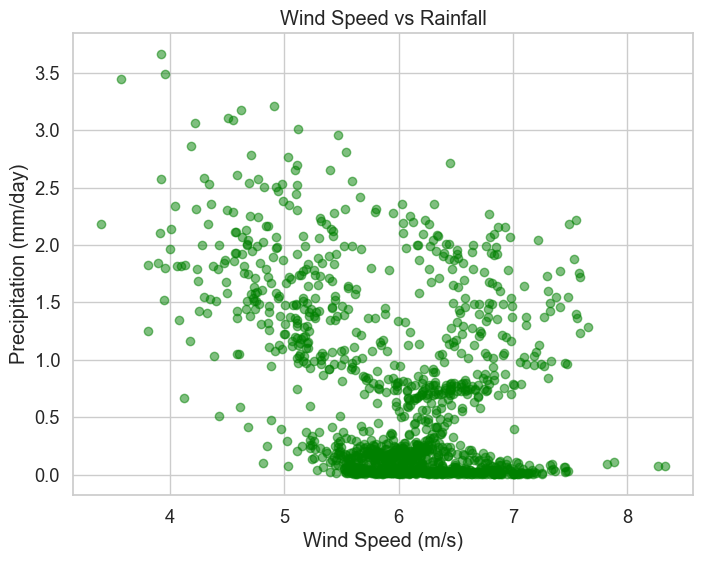

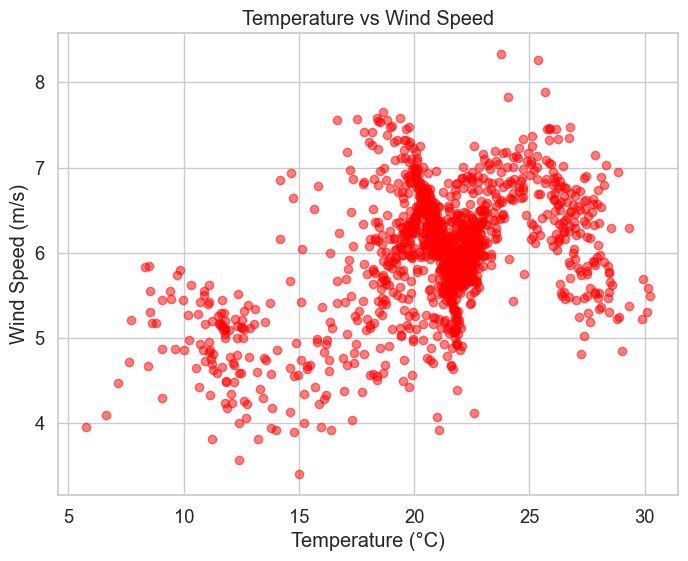

In [45]:
# ----------- Scatter: Temperature vs Rain -----------
plt.figure(figsize=(8,6))
plt.scatter(df["temperature_C"], df["precipitation_mm_day"], alpha=0.5, color="blue")
plt.title("Temperature vs Rainfall")
plt.xlabel("Temperature (°C)")
plt.ylabel("Precipitation (mm/day)")
plt.grid(True)
plt.show()

# ----------- Scatter: Wind Speed vs Rain -----------
plt.figure(figsize=(8,6))
plt.scatter(df["wind_speed_ms"], df["precipitation_mm_day"], alpha=0.5, color="green")
plt.title("Wind Speed vs Rainfall")
plt.xlabel("Wind Speed (m/s)")
plt.ylabel("Precipitation (mm/day)")
plt.grid(True)
plt.show()

# ----------- Scatter: Temperature vs Wind Speed -----------
plt.figure(figsize=(8,6))
plt.scatter(df["temperature_C"], df["wind_speed_ms"], alpha=0.5, color="red")
plt.title("Temperature vs Wind Speed")
plt.xlabel("Temperature (°C)")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)
plt.show()


📊 Correlation Matrix:
                      precipitation_mm_day  wind_speed_ms  temperature_C
precipitation_mm_day              1.000000      -0.406624      -0.640851
wind_speed_ms                    -0.406624       1.000000       0.459997
temperature_C                    -0.640851       0.459997       1.000000


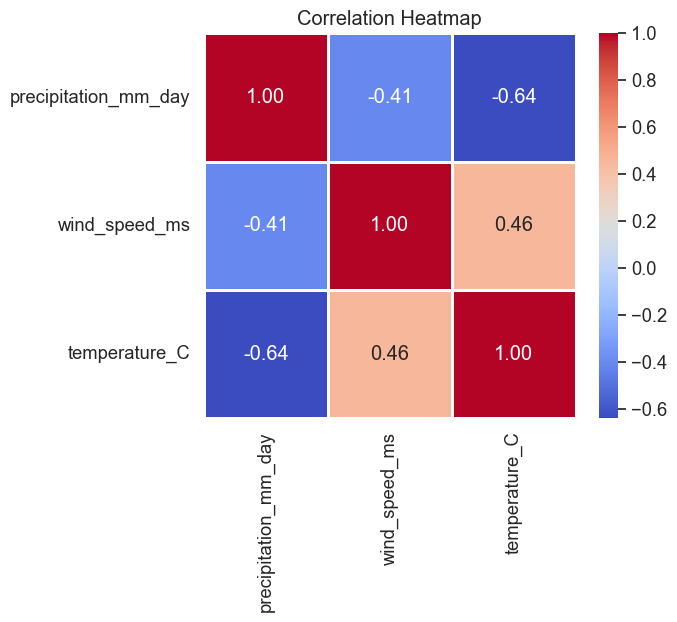

In [46]:


# ----------- Correlation Matrix -----------
corr = df[["precipitation_mm_day", "wind_speed_ms", "temperature_C"]].corr()

print("📊 Correlation Matrix:")
print(corr)

# ----------- Heatmap Visualization -----------
plt.figure(figsize=(6,5))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=1)
plt.title("Correlation Heatmap")
plt.show()
